#### Relacion entre muertos-magnitud de desastres naturales del periodo 2018-2021

#### 1. leemos el archivo desde el cual manipularemos los datos

In [10]:
import pandas as pd

file = pd.read_excel("../database/database_2018_2021.xlsx")
file.head() 

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2018-0002-CHE,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,Eleanor,CHE,...,NaN,NaN,16300.0,19779.0,NaN,NaN,82.410668,"[{""adm1_code"":2812,""adm1_name"":""Bern""},{""adm1_...",2018-01-04,2023-09-25
1,2018-0002-ESP,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,Eleanor,ESP,...,NaN,NaN,NaN,NaN,NaN,NaN,82.410668,"[{""adm2_code"":25825,""adm2_name"":""Gipuzkoa""}]",2018-01-04,2023-09-25
2,2018-0002-FRA,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,Eleanor,FRA,...,NaN,NaN,NaN,NaN,200000.0,242687.0,82.410668,"[{""adm1_code"":1253,""adm1_name"":""Bretagne""},{""a...",2018-01-04,2023-09-25
3,2018-0002-GBR,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,Eleanor,GBR,...,NaN,NaN,NaN,NaN,NaN,NaN,82.410668,"[{""adm1_code"":3182,""adm1_name"":""England""},{""ad...",2018-01-05,2023-09-25
4,2018-0002-IRL,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,Eleanor,IRL,...,NaN,NaN,NaN,NaN,NaN,NaN,82.410668,"[{""adm1_code"":1584,""adm1_name"":""Clare""},{""adm1...",2018-01-04,2023-09-25


### Filtros

#### 2.1 filtramos las columnas que nos interesa para nuestro analisis

In [16]:
columnas_relevantes = [
    'Start Year', 'Start Month', 'Start Day', 
    'Country', 'Region', 'Location', 'Magnitude', 
    "Disaster Subgroup", 'Total Deaths', 'No. Injured',
    'No. Affected', 'Total Affected', 'Total Damage (\'000 US$)' 
]

df_hydrological = file[columnas_relevantes]
df_hydrological.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Start Year               1617 non-null   int64  
 1   Start Month              1604 non-null   float64
 2   Start Day                1468 non-null   float64
 3   Country                  1617 non-null   object 
 4   Region                   1617 non-null   object 
 5   Location                 1499 non-null   object 
 6   Magnitude                374 non-null    float64
 7   Disaster Subgroup        1617 non-null   object 
 8   Total Deaths             1115 non-null   float64
 9   No. Injured              472 non-null    float64
 10  No. Affected             1131 non-null   float64
 11  Total Affected           1310 non-null   float64
 12  Total Damage ('000 US$)  483 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 164.4+ KB


#### 2.2 Filtramos por desastre natural Hydrological

In [18]:
df_hydrological = df_hydrological[df_hydrological["Disaster Subgroup"] == "Hydrological"] # filtro por tipo de desastre Hydrological
df_hydrological.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 6 to 1598
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Start Year               813 non-null    int64  
 1   Start Month              813 non-null    float64
 2   Start Day                791 non-null    float64
 3   Country                  813 non-null    object 
 4   Region                   813 non-null    object 
 5   Location                 802 non-null    object 
 6   Magnitude                109 non-null    float64
 7   Disaster Subgroup        813 non-null    object 
 8   Total Deaths             605 non-null    float64
 9   No. Injured              182 non-null    float64
 10  No. Affected             666 non-null    float64
 11  Total Affected           716 non-null    float64
 12  Total Damage ('000 US$)  174 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 88.9+ KB


#### 2.3 Filtamos los datos de magnitud para que no nos queden datos NaN

In [20]:
df_hydrological_magnitude = df_hydrological[df_hydrological["Magnitude"] > 0]
df_hydrological_magnitude.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 6 to 1423
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Start Year               109 non-null    int64  
 1   Start Month              109 non-null    float64
 2   Start Day                107 non-null    float64
 3   Country                  109 non-null    object 
 4   Region                   109 non-null    object 
 5   Location                 107 non-null    object 
 6   Magnitude                109 non-null    float64
 7   Disaster Subgroup        109 non-null    object 
 8   Total Deaths             80 non-null     float64
 9   No. Injured              29 non-null     float64
 10  No. Affected             104 non-null    float64
 11  Total Affected           107 non-null    float64
 12  Total Damage ('000 US$)  23 non-null     float64
dtypes: float64(8), int64(1), object(4)
memory usage: 11.9+ KB


In [45]:
df_hydrological_magnitude.isnull().sum() # Verificamos cuantos datos nulos tenemos

Start Year                  0
Start Month                 0
Start Day                   2
Country                     0
Region                      0
Location                    2
Magnitude                   0
Disaster Subgroup           0
Total Deaths               29
No. Injured                80
No. Affected                5
Total Affected              2
Total Damage ('000 US$)    86
dtype: int64

#### 2.4 Filtramos la cantidad de muertos

In [59]:
muertos = df_hydrological_magnitude["Total Deaths"]
muertos = df_hydrological_magnitude[muertos > 0]
muertos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 6 to 1423
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Start Year               80 non-null     int64  
 1   Start Month              80 non-null     float64
 2   Start Day                79 non-null     float64
 3   Country                  80 non-null     object 
 4   Region                   80 non-null     object 
 5   Location                 78 non-null     object 
 6   Magnitude                80 non-null     float64
 7   Disaster Subgroup        80 non-null     object 
 8   Total Deaths             80 non-null     float64
 9   No. Injured              29 non-null     float64
 10  No. Affected             75 non-null     float64
 11  Total Affected           78 non-null     float64
 12  Total Damage ('000 US$)  21 non-null     float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.8+ KB


In [326]:

indices = list(range(1,81))
muertos.index = indices
muertos.head()

,Start Year,Start Month,Start Day,Country,Region,Location,Magnitude,Disaster Subgroup,Total Deaths,No. Injured,No. Affected,Total Affected,Total Damage ('000 US$)
1,2018,1.0,3.0,Democratic Republic of the Congo,Africa,"Galiema, Bandalungwa, Selembao, Masina, Limete...",5597.13,Hydrological,51.0,17.0,NaN,15760.0,NaN
2,2018,2.0,14.0,Brazil,Americas,Rio de Janeiro,55138.95,Hydrological,4.0,NaN,250.0,250.0,10000.0
3,2018,2.0,10.0,Bolivia (Plurinational State of),Americas,"Tarija, Cochabamba,",245647.66,Hydrological,6.0,186.0,12000.0,12186.0,NaN
4,2018,2.0,1.0,Malawi,Africa,"Karonga, Kyungu, Salima, Lilongwe district, Ph...",25660.35,Hydrological,1.0,NaN,300.0,300.0,NaN
5,2018,1.0,1.0,Malaysia,Asia,"Kuantan, Rompin, Pekan, Jerantut, Lipis, Bera ...",117492.07,Hydrological,2.0,NaN,12000.0,12000.0,NaN


#### Guardamos la data 

In [73]:
muertos.to_excel("../database/Data_Procesada_2018-2021.xlsx")

#### Leemos el archivo con la data procesada

In [77]:
import pandas as pd
muertos = pd.read_excel("../database/Data_Procesada_2018-2021.xlsx")

### Graficas

#### 3.1 Graficas de desastre por año

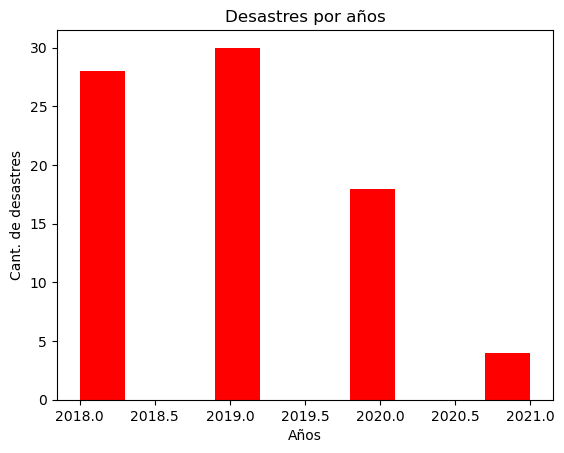

In [4]:
import matplotlib.pyplot as plt

dates = muertos["Start Year"]
plt.hist(dates, color="red")
plt.title("Desastres por años")
plt.ylabel("Cant. de desastres")
plt.xlabel("Años")
plt.show()

#### 3.2 Grafica de desastres por region

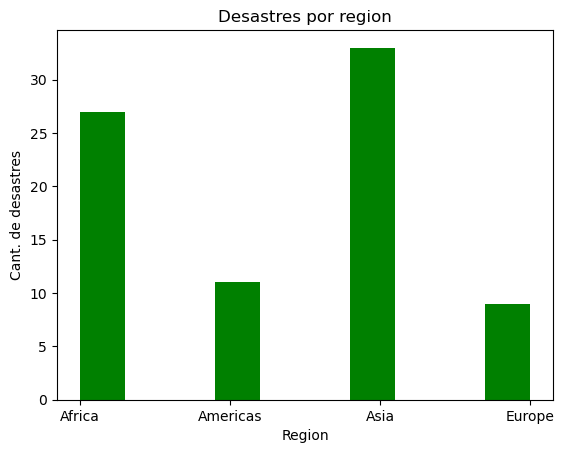

In [6]:
region = muertos["Region"]
plt.hist(region, color="green")
plt.title("Desastres por region")
plt.ylabel("Cant. de desastres")
plt.xlabel("Region")
plt.show()

#### 3.3 Grafica por desastre en ubicacion geografica (paises) | Beta

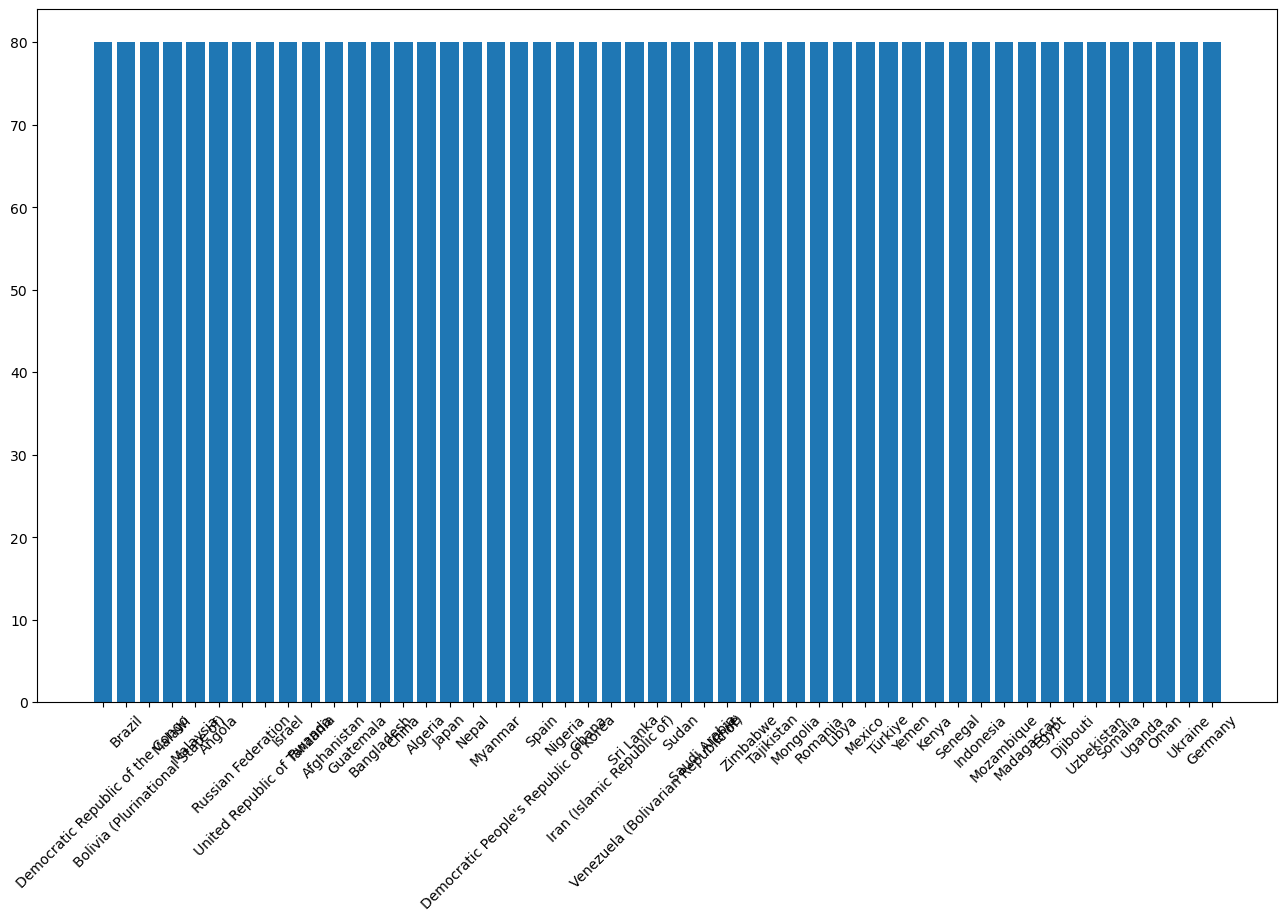

In [71]:
# No funciona, luego vere como se hace
ubicacion = muertos["Country"]
plt.figure(figsize=(16,9))
plt.xticks(rotation=45)
plt.bar(ubicacion, len(ubicacion))
# # plt.title("Desastres por años")
# # plt.ylabel("Cant. de desastres")
# # plt.xlabel("Años")
plt.show()

#### 3.4 Grafica de muertos

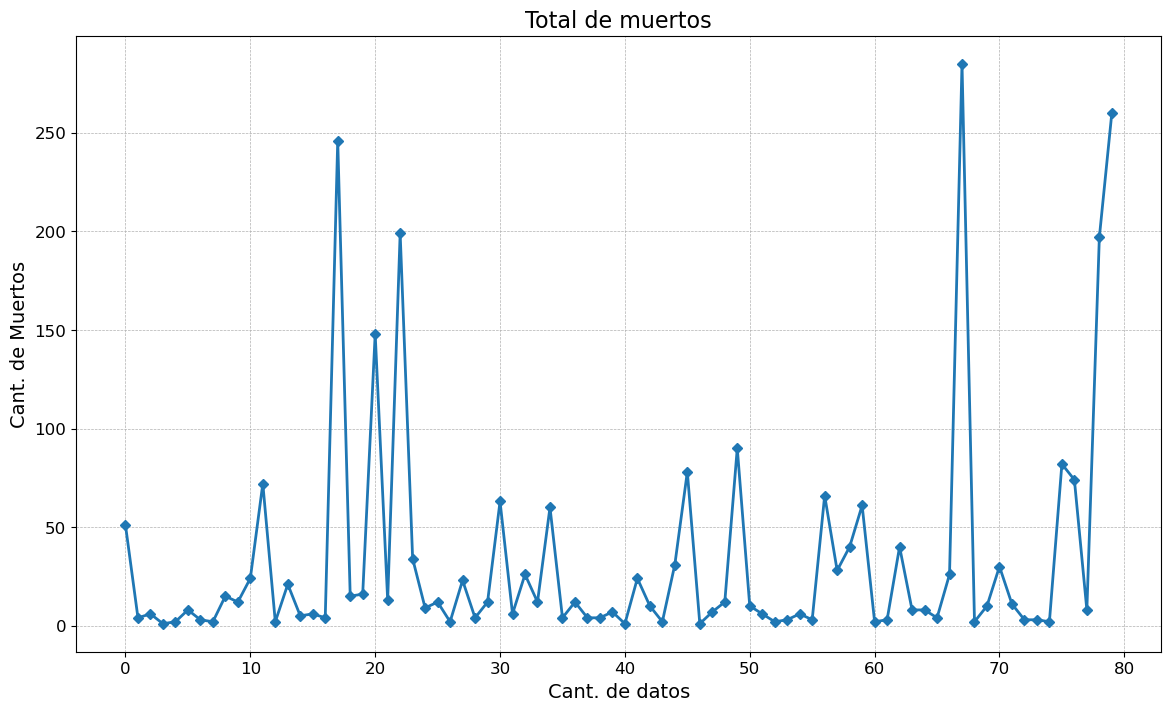

In [10]:
total_deaths = muertos['Total Deaths']

plt.figure(figsize=(14,8))
plt.plot(total_deaths, marker='D',linewidth=2, markersize=5)
plt.title('Total de muertos', fontsize=16)
plt.xlabel('Cant. de datos', fontsize=14)
plt.ylabel('Cant. de Muertos', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

In [12]:
total_deaths.describe()

count     80.000000
mean      33.850000
std       59.670424
min        1.000000
25%        4.000000
50%       10.000000
75%       30.250000
max      285.000000
Name: Total Deaths, dtype: float64

#### 3.5 Grafica de magnitud del desastre

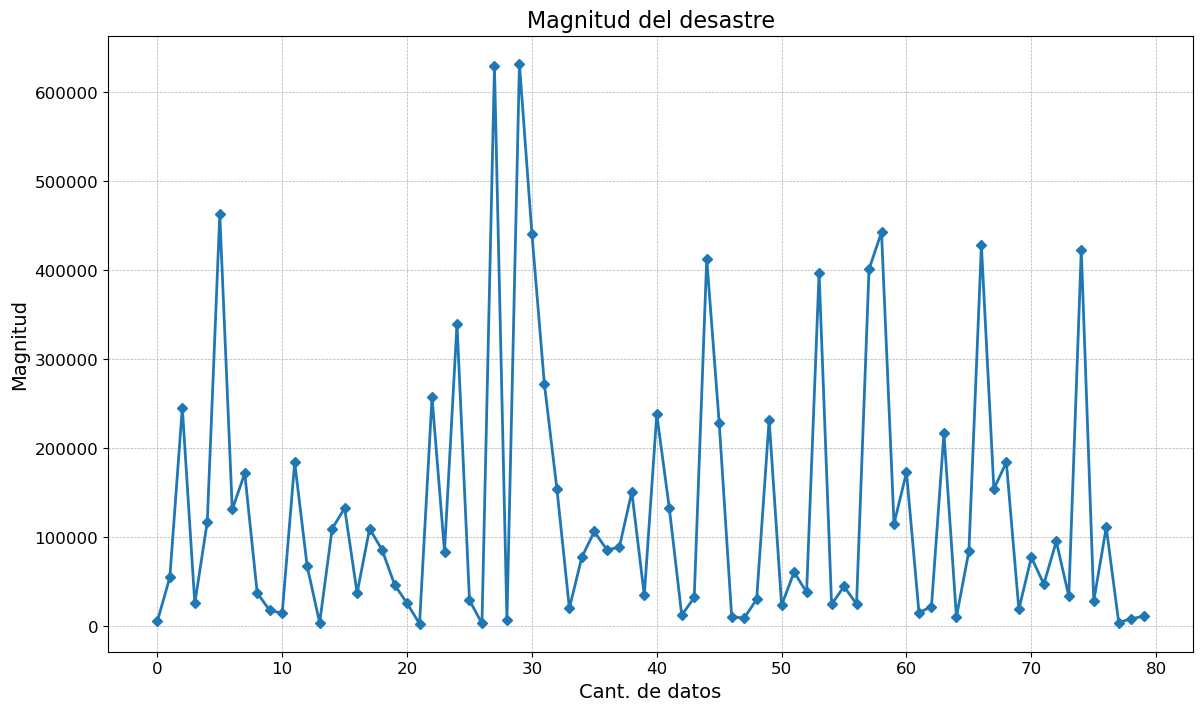

In [14]:
magnitud = muertos['Magnitude']
plt.figure(figsize=(14,8))
plt.plot(magnitud, marker='D',linewidth=2, markersize=5)
plt.title('Magnitud del desastre', fontsize=16)
plt.xlabel('Cant. de datos', fontsize=14)
plt.ylabel('Magnitud', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [16]:
magnitud.describe()

count        80.000000
mean     132151.742125
std      150955.021344
min        2882.250000
25%       24910.287500
50%       80905.315000
75%      175770.752500
max      632315.720000
Name: Magnitude, dtype: float64

#### 3.6 Relacion entre la magnitud-muertes

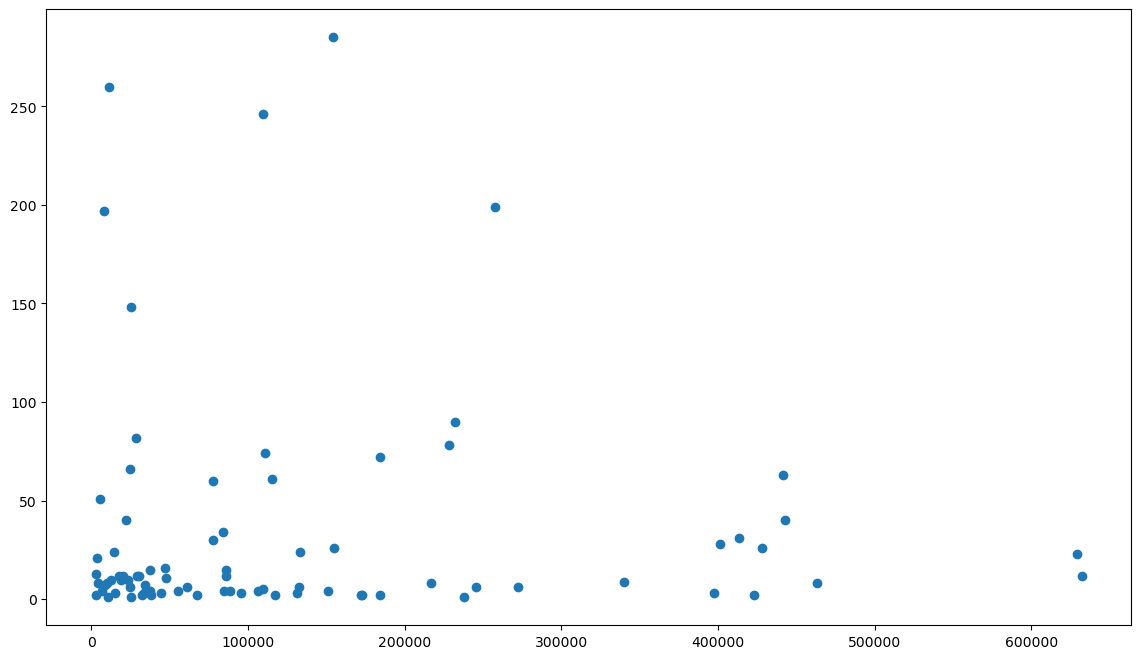

In [61]:
relacion_mag_deaths = pd.DataFrame({'Magnitud':muertos['Magnitude'],  'Muertos':muertos['Total Deaths']})
relacion_mag_deaths = relacion_mag_deaths.sort_values(by='Muertos')
relacion_mag_deaths.head()
plt.figure(figsize=(14,8))
plt.scatter(relacion_mag_deaths['Magnitud'], relacion_mag_deaths['Muertos'])
plt.show()